# Part I - Ford Gobike System Data Exploration
## by Gerald Aguocha

## Introduction
> Introducing the dataset:  
This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco bay 
area.  


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
print(df.shape)
print(df.dtypes)
df.head(9)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No


In [3]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [5]:
# seperating the time and date value in start time and end time variables
new_df = df.copy()
new_df = pd.DataFrame(new_df)

In [6]:
new_df['time_start'] = new_df['start_time'].apply(lambda x:x.split()[1])
new_df['start_date'] = new_df['start_time'].apply(lambda x:x.split()[0])
new_df['time_end'] = new_df['end_time'].apply(lambda x:x.split()[1])
new_df['end_date'] = new_df['end_time'].apply(lambda x:x.split()[0])
new_df.drop(columns = ['start_time','end_time'],inplace=True)

In [7]:
 new_df.head(2)

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,time_start,start_date,time_end,end_date
0,52185,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,17:32:10.1450,2019-02-28,08:01:55.9750,2019-03-01
1,42521,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,18:53:21.7890,2019-02-28,06:42:03.0560,2019-03-01


In [8]:
#changing the data types of columns
variables = ['start_station_id','start_station_latitude','start_station_longitude','end_station_id','end_station_latitude',
            'end_station_longitude','bike_id','member_birth_year']
for var in variables:
    new_df[var] = new_df[var].astype('object')
new_df['start_date'] = pd.to_datetime(new_df['start_date'])
new_df['end_date'] = pd.to_datetime(new_df['end_date'])

In [9]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 18 columns):
duration_sec               183412 non-null int64
start_station_id           183215 non-null object
start_station_name         183215 non-null object
start_station_latitude     183412 non-null object
start_station_longitude    183412 non-null object
end_station_id             183215 non-null object
end_station_name           183215 non-null object
end_station_latitude       183412 non-null object
end_station_longitude      183412 non-null object
bike_id                    183412 non-null object
user_type                  183412 non-null object
member_birth_year          175147 non-null object
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
time_start                 183412 non-null object
start_date                 183412 non-null datetime64[ns]
time_end                   183412 non-null object
end_date                   18341

In [10]:
# handling the null values
new_df['member_gender'].fillna('Unknown',inplace=True)
new_df = new_df[~new_df['member_birth_year'].isnull()]

In [11]:
order = new_df['start_date'].value_counts().index

### What is the structure of your dataset?

> The dataset contains 183421 rows and 16 columns (before cleaning)  
> The dataset contains 175147 rows and 16 columns (after cleaning)  
> most of the data are qualitative with just duration_sec being the numerical data

### What is/are the main feature(s) of interest in your dataset?

> I am most intersted in the duration_sec feature 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think the member birth date would help in determing if there was any age factor involved in users becoming subscribers or just customers, and would also help in determing how long a users trip would take
> other variables of interes would include start date, end date, start time,end time, user_type,member_gender

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


I will start by looking at the main variable of interest start date and start time and the duration seconds.

In [12]:
new_df['duration_sec'].describe()

count    175147.000000
mean        704.211845
std        1641.608363
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

Text(0.5,1,'A Histogram showing the distribution of the duration_sec')

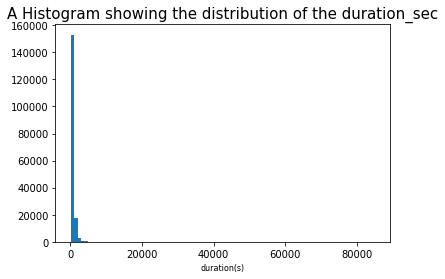

In [13]:
bins=np.arange(61,new_df['duration_sec'].max()+1000,1000)
plt.hist(data=new_df,x='duration_sec',bins=bins);
plt.xlabel('duration(s)',size=8)
plt.title('A Histogram showing the distribution of the duration_sec',size=15)

The duration seconds values are packed at the zero values, a log transformation would be able to visualize the data better

In [14]:
np.log10(new_df['duration_sec']).describe()

count    175147.000000
mean          2.707921
std           0.305277
min           1.785330
25%           2.509203
50%           2.707570
75%           2.897077
max           4.927103
Name: duration_sec, dtype: float64

Text(0.5,1,'A Histogram showing the distribution of the duration_sec')

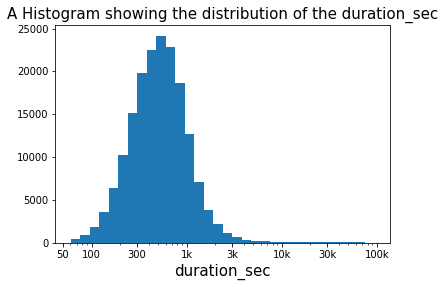

In [15]:
# creating a histogram to show the distribution of duration_sec
bins=10**np.arange(1.78,4.92+0.1,0.1)
plt.hist(data=new_df,x='duration_sec',bins=bins);
plt.xscale('log')
ticks=[50,100,300,1000,3000,10000,30000,100000]
labels = ['50','100','300','1k','3k','10k','30k','100k']
plt.xticks(ticks,labels);
plt.xlabel('duration_sec',size=15)
plt.title('A Histogram showing the distribution of the duration_sec',size=15)

The distribution of the duration_seconds is right skewed, it is unimodal with majority falling within 60 to 1000,and the less amount from 3k upwards.

from the plot above the outlier is from the 5k to 84k duration_sec which i would now remove from the dataset to avoid coming to wrong conclusions.

In [16]:
new_df = new_df[new_df['duration_sec'] <5000]

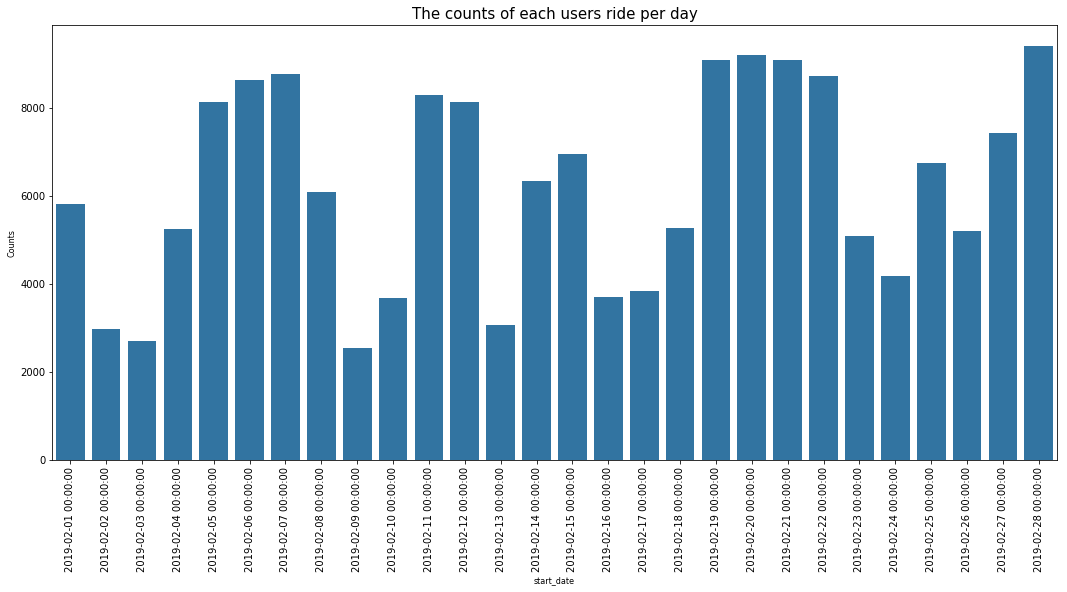

In [17]:
# plotting a countplot for each start date
base_color = sb.color_palette()[0]
order = new_df['start_date'].sort_index(ascending=False).reset_index()
order=order.groupby('start_date').size().index
order = order
plt.figure(figsize=[18,8])
sb.countplot(data=new_df,x=new_df['start_date'],color=base_color,order=order);
plt.xticks(rotation=90);
plt.xlabel('start_date',size=8);
plt.ylabel('Counts',size=8);
plt.title('The counts of each users ride per day',size=15);

Most bike ride started on the 28th of febuary 2019 with a value of around 10,00 rides(maybe there was an awareness!), the smallest being on the 9th of feburary with a value around 2500. I wonder how this counts played out within the week. days such as 5th-7th and 19th-21th had this large hikes in number of rides it could be work looking into if there was a holiday or awareness program

In [18]:
def week_number_of_month(date_value):
    """this fumction derives the week of the month for each month of the start date.
        @isocalender: return a tuple of the date broken into year, week number and weekday
        @replace(day=1): replace the date with the first day of each month in that year"""
    return (date_value.isocalendar()[1] - date_value.replace(day=1).isocalendar()[1] + 1)

Text(0.5,1,'The counts of each users ride per week')

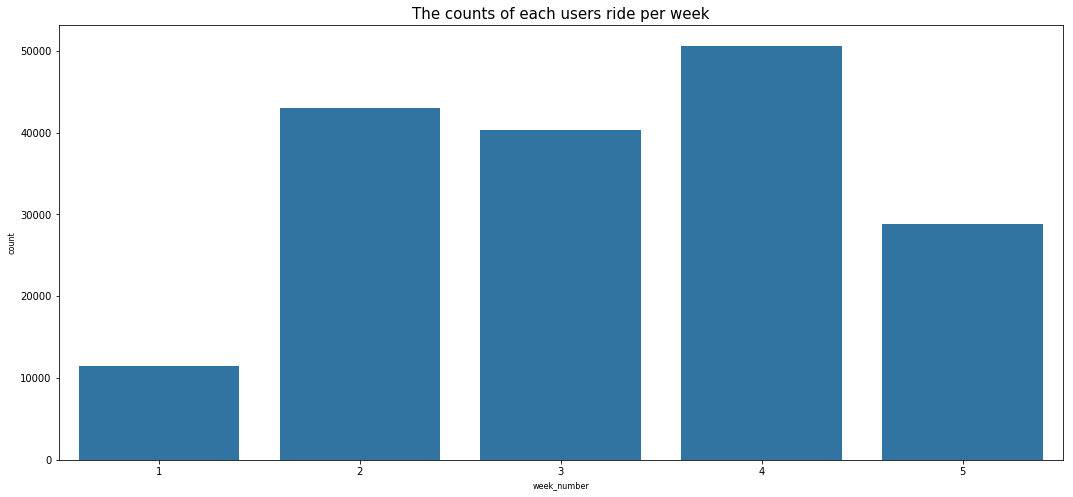

In [19]:
new_df['week_number'] = new_df['start_date'].apply(week_number_of_month)
# plotting a count plot for each week of the start date
plt.figure(figsize=[18,8])
sb.countplot(data=new_df,x='week_number',color=base_color)
plt.xlabel('week_number',size=8)
plt.ylabel('count',size=8)
plt.title('The counts of each users ride per week',size=15)

after applying feature engineering to the start date variable to get the week numbers in a month, The second to fourth week did the well, with the fourth week having the highest amount of rides of about 6000, the fifth week performing much better than the first week (what could have been the cause of the reduction in the fifth week though?), this would be worth giving a deeper look. 

In [20]:
# creating a column that identifies the day of the week from start date.
import calendar
def weekday_name(date):
    """this function extracts the day of the week from the date values
      @date: this is the date value passed in to the function
      @weekday(): this creates the day of the week but records it as a number
      @calendar.day_name: this then converts the numbers from the weekday function into weekday names"""
    record = date.weekday()
    return calendar.day_name[record]
new_df['dow'] = new_df['start_date'].apply(weekday_name) + " " +'wk'+(new_df['week_number'].astype('str'))
new_df['dow'] = new_df['dow'].apply(lambda x:x.lower())
new_df.head(10)

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,time_start,start_date,time_end,end_date,week_number,dow
4,1585,7,Frank H Ogawa Plaza,37.8046,-122.272,222,10th Ave at E 15th St,37.7927,-122.249,4898,Subscriber,1974,Male,Yes,23:54:18.5490,2019-02-28,00:20:44.0740,2019-03-01,5,thursday wk5
5,1793,93,4th St at Mission Bay Blvd S,37.7704,-122.391,323,Broadway at Kearny,37.798,-122.406,5200,Subscriber,1959,Male,No,23:49:58.6320,2019-02-28,00:19:51.7600,2019-03-01,5,thursday wk5
6,1147,300,Palm St at Willow St,37.3173,-121.885,312,San Jose Diridon Station,37.3297,-121.902,3803,Subscriber,1983,Female,No,23:55:35.1040,2019-02-28,00:14:42.5880,2019-03-01,5,thursday wk5
7,1615,10,Washington St at Kearny St,37.7954,-122.405,127,Valencia St at 21st St,37.7567,-122.421,6329,Subscriber,1989,Male,No,23:41:06.7660,2019-02-28,00:08:02.7560,2019-03-01,5,thursday wk5
8,1570,10,Washington St at Kearny St,37.7954,-122.405,127,Valencia St at 21st St,37.7567,-122.421,6548,Subscriber,1988,Other,No,23:41:48.7900,2019-02-28,00:07:59.7150,2019-03-01,5,thursday wk5
9,1049,19,Post St at Kearny St,37.789,-122.403,121,Mission Playground,37.7592,-122.421,6488,Subscriber,1992,Male,No,23:49:47.6990,2019-02-28,00:07:17.0250,2019-03-01,5,thursday wk5
10,458,370,Jones St at Post St,37.7873,-122.413,43,San Francisco Public Library (Grove St at Hyde...,37.7788,-122.416,5318,Subscriber,1996,Female,Yes,23:57:57.2110,2019-02-28,00:05:35.4350,2019-03-01,5,thursday wk5
11,506,44,Civic Center/UN Plaza BART Station (Market St ...,37.7811,-122.412,343,Bryant St at 2nd St,37.7832,-122.394,5848,Subscriber,1993,Male,No,23:56:55.5400,2019-02-28,00:05:21.7330,2019-03-01,5,thursday wk5
12,1176,127,Valencia St at 21st St,37.7567,-122.421,323,Broadway at Kearny,37.798,-122.406,5328,Customer,1990,Male,No,23:45:12.6510,2019-02-28,00:04:49.1840,2019-03-01,5,thursday wk5
14,395,243,Bancroft Way at College Ave,37.8694,-122.254,252,Channing Way at Shattuck Ave,37.8658,-122.267,4786,Subscriber,1988,Male,No,23:56:26.8480,2019-02-28,00:03:01.9470,2019-03-01,5,thursday wk5


In [21]:
day_cat = ['sunday wk1','friday wk1','saturday wk1','sunday wk2','monday wk2','tuesday wk2','wednesday wk2','thursday wk2',
           'friday wk2','saturday wk2','sunday wk3','monday wk3','tuesday wk3','wednesday wk3','thursday wk3','friday wk3',
          'saturday wk3','sunday wk4','monday wk4','tuesday wk4','wednesday wk4','thursday wk4','friday wk4','saturday wk4',
          'monday wk5','tuesday wk5','wednesday wk5','thursday wk5']
day_order = pd.api.types.CategoricalDtype(categories=day_cat,ordered=True)
new_df['dow'] = new_df['dow'].astype(day_order)

Text(0.5,1,'Counts of rides for each day of the week')

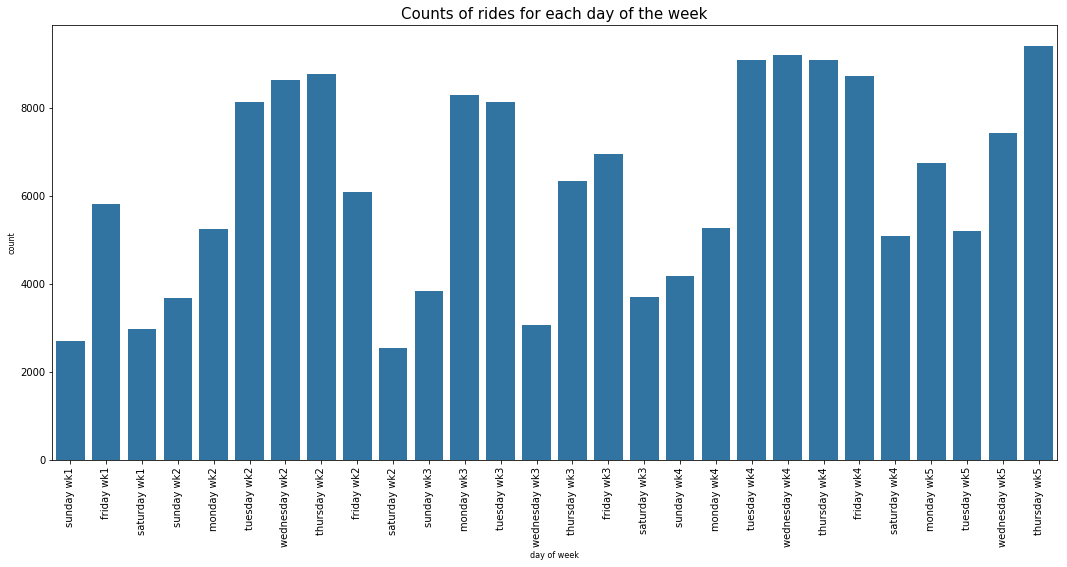

In [22]:
# creating a subplot for the days of the week
plt.figure(figsize=[18,8])
sb.countplot(data=new_df,x='dow',color=base_color);
plt.xticks(rotation=90);
plt.xlabel('day of week',size=8)
plt.ylabel('count',size=8)
plt.title('Counts of rides for each day of the week',size=15)

from the plot above, we see that weekays are more busy than weekends, this trend is perfectly seen in the week2 section

Text(0.5,1,'The count of user_type available in ford riders data')

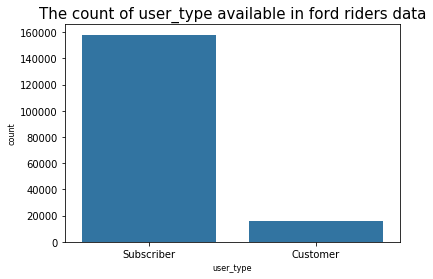

In [23]:
#plotting the user type variable
sb.countplot(data=new_df,x='user_type',color=base_color);
plt.xlabel('user_type',size=8)
plt.ylabel('count',size=8) 
plt.title('The count of user_type available in ford riders data',size=15)

The number of subscriber was hugely higher than the customers that means that the probability of a first time customer becoming a subscriber is high, I guess its what looking into later on.

Text(0.5,1,'The proportion plot between the subscriber and customer riders')

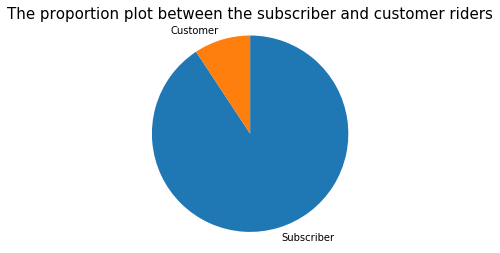

In [24]:
#plotting a pie chart to view the relative frequency
user_type_counts = new_df['user_type'].value_counts()
plt.pie(user_type_counts,labels=user_type_counts.index,startangle=90,counterclock=False);
plt.axis('square');
plt.title('The proportion plot between the subscriber and customer riders',size=15)

The pie chart makes it clearer how much of a difference between the subscriber and the customer proportions were.

Next i would check what start station had the most rides 

Text(0,0.5,'start_station_name')

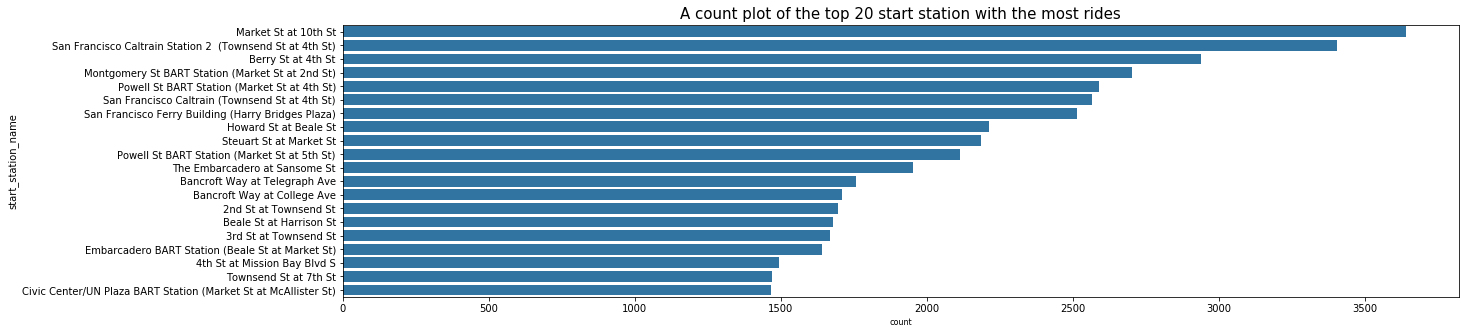

In [25]:
# plotting a count plot to show the counts of the start and end station, 
#did the start station with the most rides end the same way.
stations_count = new_df['start_station_name'].value_counts()[:20]
station_df = new_df[new_df['start_station_name'].isin(stations_count.index)]
plt.figure(figsize=[20,5])
sb.countplot(data=station_df,y='start_station_name',color=base_color,order=stations_count.index)
#plt.ticks(rotation=90)
#stations_count.index
#station_df
plt.title('A count plot of the top 20 start station with the most rides',size=15)
plt.xlabel('count',size=8)
plt.ylabel('start_station_name',size=10)

next the end station

Text(0.5,0,'count')

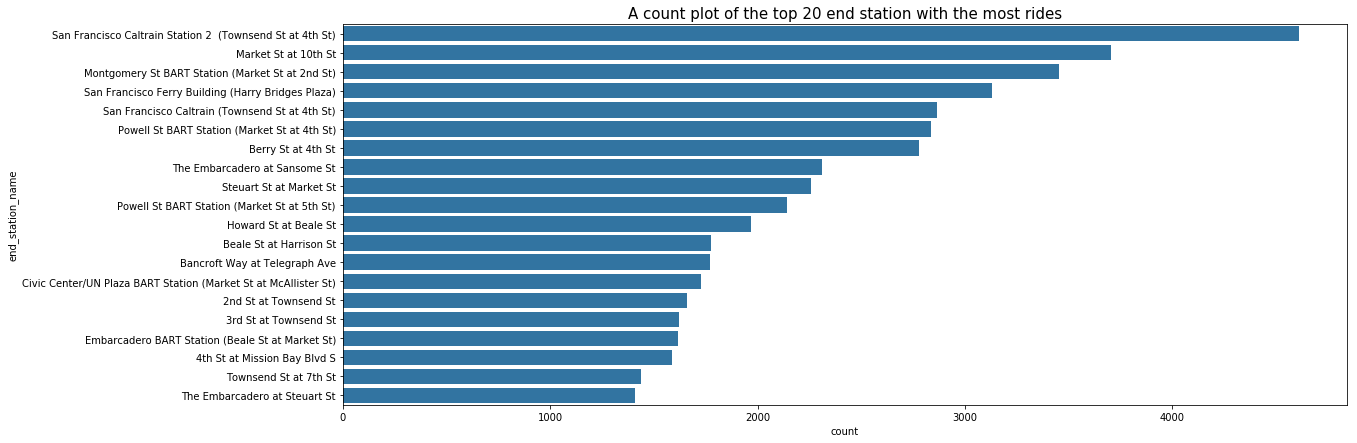

In [26]:
end_station = new_df['end_station_name'].value_counts()[:20]
end_station_df = new_df[new_df['end_station_name'].isin(end_station.index)]
# making the plot
plt.figure(figsize=[18,7])
sb.countplot(data=end_station_df,y='end_station_name',color=base_color,order=end_station.index)
plt.title('A count plot of the top 20 end station with the most rides',size=15)
plt.xlabel('count',size=10)

Even though there is not much to get from the start station and end station name, it is worth knowing that the start station with the highest rides is the Market station at 10th (maybe the customer service there is superb!), while the end station with the highest rides is the San Francisco Station 2. 

lastly, lets look at the gender column

In [27]:
new_df['member_gender'].value_counts()

Male      130068
Female     40590
Other       3603
Name: member_gender, dtype: int64

From the describe above we see that there was unidentified gender that was recorded as other, this would not lead to informative or targeted reports, for the purpose of getting understandable conclusion from the data, I would remove the other gender type from this data.

Text(0.5,1,'A plot showing the count of member_gender')

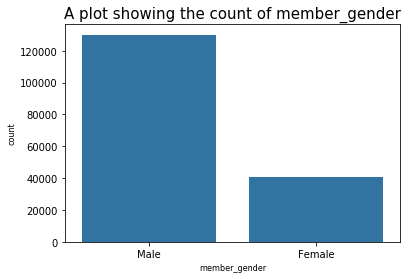

In [28]:
new_df = new_df[new_df['member_gender'].isin(['Male','Female'])]
gender_order = new_df['member_gender'].value_counts()
sb.countplot(data=new_df,x='member_gender',color=base_color,order=gender_order.index)
plt.xlabel('member_gender',size=8)
plt.ylabel('count',size=8)
plt.title('A plot showing the count of member_gender',size=15)

In [29]:
new_df['member_gender'].value_counts()

Male      130068
Female     40590
Name: member_gender, dtype: int64

next i would like to perform feature engineering on the member_birth_year columns 

In [30]:
new_df['member_age'] = 2022 - new_df['member_birth_year']
print(new_df['member_age'].max())
print(new_df['member_age'].min())
new_df['member_age'] = new_df['member_age'].astype(int)
new_df['member_age'].describe()

144.0
21.0


count    170658.000000
mean         37.153154
std          10.112575
min          21.000000
25%          30.000000
50%          35.000000
75%          42.000000
max         144.000000
Name: member_age, dtype: float64

when i looked at the distribution of the age values using the describe function, i found the maximum age present to be 144 which is obivously impropable, so I would keep only ages < 85.

In [31]:
new_df = new_df[new_df['member_age'] < 85]
new_df['member_age'].max()

84

In [32]:
age_order = new_df['member_age'].value_counts(sort=False)

Text(0.5,1,'The distribution of age of the riders')

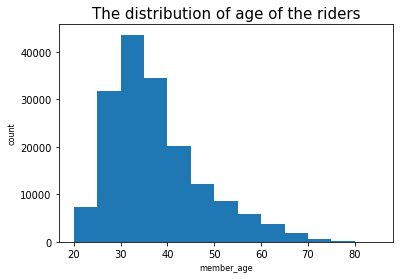

In [33]:
bins = np.arange(20,84+5,5)
#plotting a histogram to see the distribution of ages
plt.hist(x=new_df['member_age'],bins=bins);
plt.xlabel('member_age',size=8)
plt.ylabel('count',size=8)
plt.title('The distribution of age of the riders',size=15)

Majority of the users where from 20 - 45 years old

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> the values in the duration_seconds variable was centered around the zero value, so I performed a log transform on the duration variable, from the transformed variable we see the the distribution is rightlw skewed and it is a unimodal data with majority of the values falling within 60 to 1000 seconds.
> I performed feature engineering on the start date to get the week number for the month and day of the week.  
> In the duration_sec variable, I noticed outliers were present in the data from 5k to 84k seconds and i removed it from the data, in order to avoid coming to wrong conclusions.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I performed feature enginnering on the member birth date to get the age ranges of users  
> Most of the users are from 20-45 years.  
> Majority of the riders are male 
> Majority of the riders are subscribers. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

I would first start by looking at the relationship between the duration_seconds and the member age to determine if any relationship exists

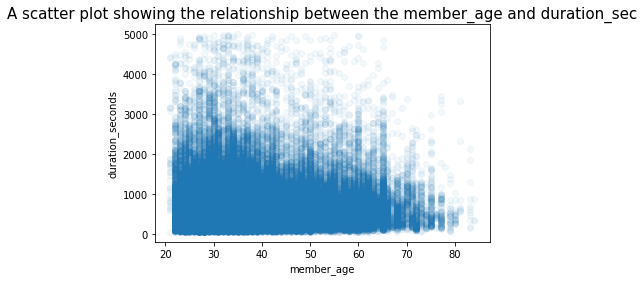

In [34]:
#plotting a scatter plot of member_age against the duration_seconds
plt.scatter(data=new_df,x='member_age',y='duration_sec',alpha=1/20);
plt.xlabel('member_age',size=10);
plt.ylabel('duration_seconds',size=10);
plt.title('A scatter plot showing the relationship between the member_age and duration_sec',size=15);

There is a weak relationship between age and duration_seconds but the duration of trips reduces as the age increases

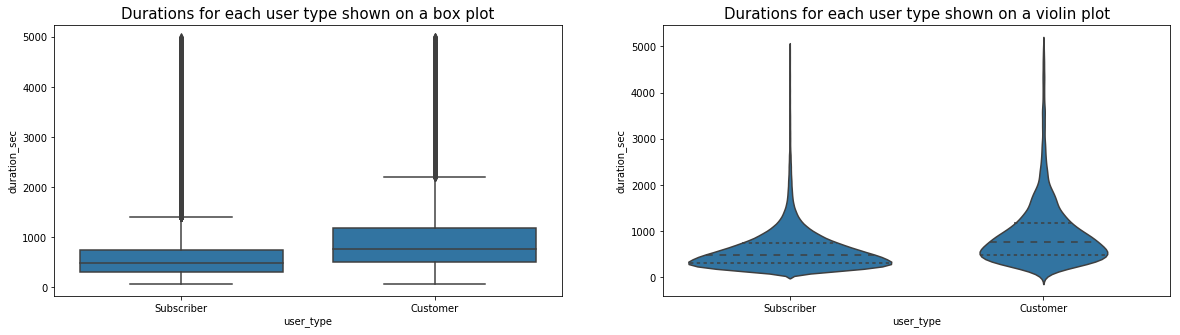

In [35]:
# checking the relatonship between user_type and duration seconds
plt.figure(figsize=[20,5]);
plt.subplot(1,2,1);
sb.boxplot(data=new_df,x='user_type',y='duration_sec',color=base_color);
plt.title('Durations for each user type shown on a box plot',size=15);
plt.subplot(1,2,2);
sb.violinplot(data=new_df,x='user_type',y='duration_sec',inner='quartile',color=base_color);
plt.title('Durations for each user type shown on a violin plot',size=15);

>The box plot tells us more about the data than the violin plot, we see from the box plot that the customers user type spend longer times on the trips than the subscribers even thought there are more subscribers than there are customers, this should be worth looking into later on.  
> In the violin plot the subscriber is more dense than the customer plot this makes sense since there are more subscribers.

Text(0.5,1,'Durations for each member gender shown on a violin plot')

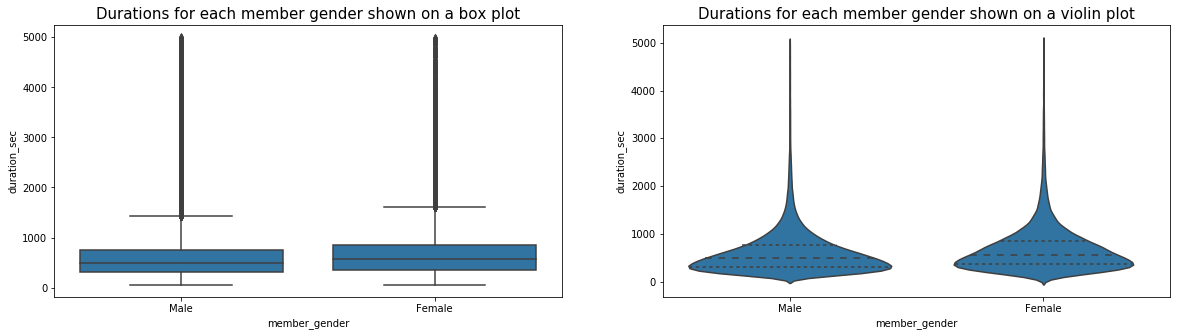

In [36]:
# plotting a box and violin plot for the member_gender on the x axis and the duration_sec on the y axis
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
sb.boxplot(data=new_df,x='member_gender',y='duration_sec',color=base_color);
plt.title('Durations for each member gender shown on a box plot',size=15)
plt.subplot(1,2,2)
sb.violinplot(data=new_df,x='member_gender',y='duration_sec',inner='quartile',color=base_color);
plt.title('Durations for each member gender shown on a violin plot',size=15)

The box plot shows us that the female gender had longer rides than the male, the female and the unknown(other) gender share equal counts 

Text(0.5,1,'Average duration of trips that was made each day')

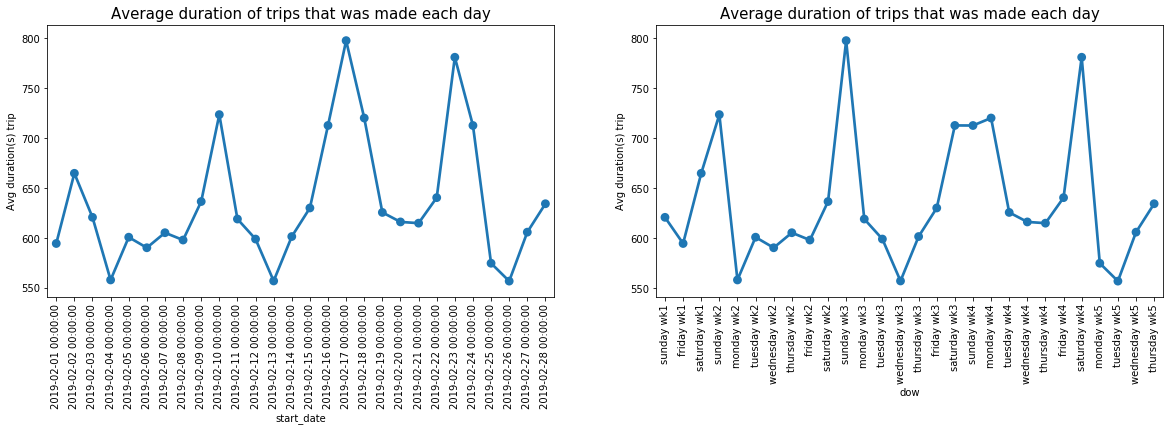

In [37]:
order = new_df['start_date'].sort_index(ascending=False).reset_index()
order=order.groupby('start_date').size().index
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
sb.pointplot(data=new_df,x=new_df['start_date'].astype('object'),y='duration_sec',order=order,ci=0)
plt.xticks(rotation=90)
plt.title('Average duration of trips that was made each day',size=15,loc='center')
plt.ylabel('Avg duration(s) trip');
plt.subplot(1,2,2)
sb.pointplot(data=new_df,x='dow',y='duration_sec',ci=0)
plt.xticks(rotation=90)
plt.ylabel('Avg duration(s) trip');
plt.title('Average duration of trips that was made each day',size=15,loc='center')

I plotted the day of week alongside the start date to check for any relationship between the day and the duration_seconds, and we see that the longest average trip was on a sunday. we see the other two spikes on the 10th and 23rd of feburary was a sunday and saturday respectively, users on weekends tends to have longer ride periods than on weekdays

Now, I would like to look at the relationship between the birth date and the user type 

Text(0.5,1,'A box plot showing the distribution of ages for each user_type')

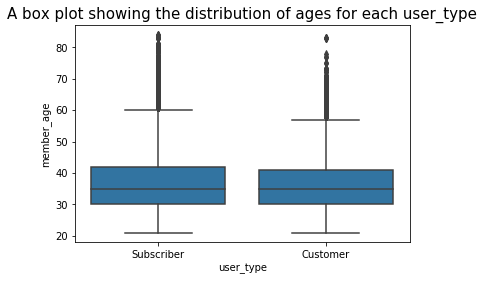

In [38]:
# a box plot of the user_type against the member_age.
sb.boxplot(data=new_df,x='user_type',y='member_age',color=base_color);
plt.title('A box plot showing the distribution of ages for each user_type',size=15)


This explains why there was a higher duration seconds for the customers than the subscribers, the users that were customers were younger than the users that where subscribers, we already know that the older user had less duration seconds.

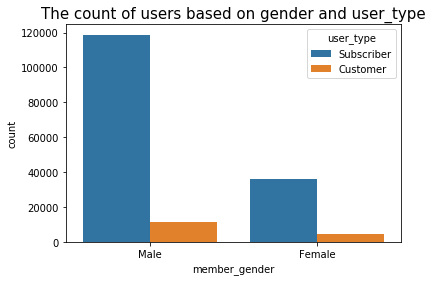

In [39]:
#checking the relationship between the user type and member gender
sb.countplot(data=new_df,x='member_gender',hue='user_type');
plt.title('The count of users based on gender and user_type',size=15);

Like we already know the subscriber is more than the customers in the ford bike dataset, but here we are ableto see how they spread across the member genders, with a noticable difference between the subscribers and the customers for each gender..

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There was a decrease in the duration seconds for older riders.  
> The customer user type had more duration seconds than subscribers even though there were more subscribers, I took a closer look into this and found that the reason for this was due to the fact that the customers user type was younger than the subscriber user type.  
> There was longer rides during the weekens than on weekdays.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is a huge difference between the subcribers and customers across the member gender.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


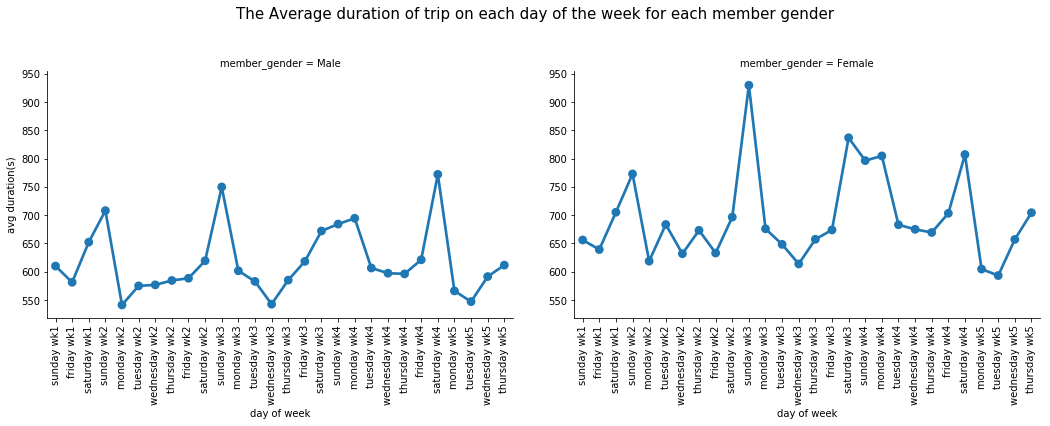

In [40]:
# I would plot a facet grid to show the duration seconds on each day of the week by the gender, maybe this would clearly tell us
# the relationships between this three variables if there is any
plt.figure(figsize=[20,4]);
g = sb.FacetGrid(data=new_df,col='member_gender',size=5,aspect=1.5);
g.map(sb.pointplot,'dow','duration_sec',ci=0);
g.set_xticklabels(rotation=90);
g.fig.subplots_adjust(top=0.8);
g.fig.suptitle('The Average duration of trip on each day of the week for each member gender',size=15);
g.set_axis_labels('day of week','avg duration(s)');

Using the multi variate plot we are able to see relationships between the three variables, 
> We clearly see again that female gender had longer rides than males.  
> Longer rides occurred during the weekends.

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


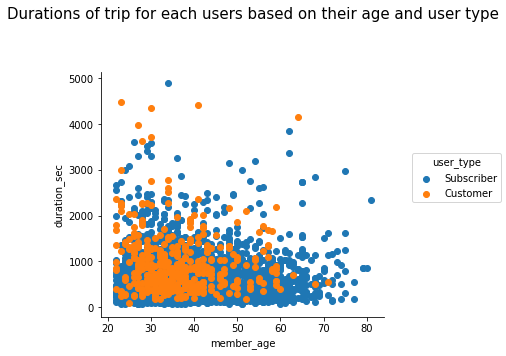

In [41]:
# plotting the duration_sec against the age and user type
# I would select a smaller sample size to avoid overplotting
samples = np.random.choice(new_df.shape[0],5000,replace=True)
df_samples = new_df.loc[samples,:]
g = sb.FacetGrid(data=df_samples,hue='user_type',size=5);
g.map(plt.scatter,'member_age','duration_sec');
g.add_legend();
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Durations of trip for each users based on their age and user type',size=15);

We see how majority of customers age was within 21-40 which is why they have longer rides because they are younger an probably haven't been using the service as often as out older users which is why they have not become subscribe users yet, we see the reduction in duration_sec for older user, most of which are subscribers 

Lastly, let I would look at the relationship between the user_type, duration_sec and member_gender

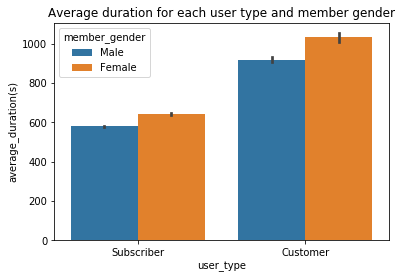

In [42]:
# creating a bar plot to show the average duration_sec against user_type for each member_gender.
sb.barplot(data=new_df,x='user_type',y='duration_sec',hue='member_gender');
plt.ylabel('average_duration(s)');
plt.title('Average duration for each user type and member gender');

> Female customers have longer rides than the males for each user type.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> the customers age was within 21-40 which is why they have longer rides because they are younger an probably haven't been using the service as often as out older users which is why they have not become subscribe users yet, we see the reduction in duration_sec for older user, most of which are subscribers

### Were there any interesting or surprising interactions between features?

> Female customers have longer rides than the males for each user type.

## Conclusions
> After careful analysis I have come to the following conclusions about the riders dataset and what influences their length of rides
* The age of the users had an effect on hoe far they could go, I noticed a reduction in duration for older users
* majority of the younger users were not subscribers yet
* females had longer rides than male
* the weekends recorded the longest durations


In [1]:
num = [1,2,3,4,5]
num.remove(2)
num


[1, 3, 4, 5]

In [2]:
5 != 6

True

In [4]:
x = {1,2,3,4,5}
x.add(5)
x.add(6)
print(x)

{1, 2, 3, 4, 5, 6}


In [5]:
print(num,intersection(x))

NameError: name 'intersection' is not defined

In [7]:
{x : x*x for x in range(1,100)}

{1: 1,
 2: 4,
 3: 9,
 4: 16,
 5: 25,
 6: 36,
 7: 49,
 8: 64,
 9: 81,
 10: 100,
 11: 121,
 12: 144,
 13: 169,
 14: 196,
 15: 225,
 16: 256,
 17: 289,
 18: 324,
 19: 361,
 20: 400,
 21: 441,
 22: 484,
 23: 529,
 24: 576,
 25: 625,
 26: 676,
 27: 729,
 28: 784,
 29: 841,
 30: 900,
 31: 961,
 32: 1024,
 33: 1089,
 34: 1156,
 35: 1225,
 36: 1296,
 37: 1369,
 38: 1444,
 39: 1521,
 40: 1600,
 41: 1681,
 42: 1764,
 43: 1849,
 44: 1936,
 45: 2025,
 46: 2116,
 47: 2209,
 48: 2304,
 49: 2401,
 50: 2500,
 51: 2601,
 52: 2704,
 53: 2809,
 54: 2916,
 55: 3025,
 56: 3136,
 57: 3249,
 58: 3364,
 59: 3481,
 60: 3600,
 61: 3721,
 62: 3844,
 63: 3969,
 64: 4096,
 65: 4225,
 66: 4356,
 67: 4489,
 68: 4624,
 69: 4761,
 70: 4900,
 71: 5041,
 72: 5184,
 73: 5329,
 74: 5476,
 75: 5625,
 76: 5776,
 77: 5929,
 78: 6084,
 79: 6241,
 80: 6400,
 81: 6561,
 82: 6724,
 83: 6889,
 84: 7056,
 85: 7225,
 86: 7396,
 87: 7569,
 88: 7744,
 89: 7921,
 90: 8100,
 91: 8281,
 92: 8464,
 93: 8649,
 94: 8836,
 95: 9025,
 96: 92

In [10]:
import numpy as np
t = np.array([1,3],[2,4])
print(t.max(axis=1))

TypeError: data type not understood